In [1]:
import pandas as pd

# import original dataset
ycc = pd.read_csv('ycc_dataset_large/ycc_not_reply.csv')
ycc.drop('Unnamed: 0', axis=1, inplace=True)

# import lda data
lda_info = ['dominant_topic', 'topic_perc_contrib', 'key_words']
dominant_topics = pd.read_csv(
    'ycc_dataset_large/ycc_not_reply_10topic_model.csv', usecols=lda_info
)

# merge the datasets
ycc_lda = pd.merge(dominant_topics, ycc, left_index=True, right_index=True)
ycc_lda = ycc_lda.drop(labels=['target_cid', 'host_reply'], axis=1)

# dropping if post was edited, it looks like non-reply comments do not edit as much?
ycc_lda = ycc_lda.drop('post_edited', axis=1)

In [2]:
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # null count for a column. columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # count the unique values in a column
        # useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # find the types of data in the column
        # find out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        # dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    return eda_df

eda_ycc = eda_helper(ycc_lda)
eda_ycc

,data_type,null_count,unique_count
dominant_topic,{float},0,10
topic_perc_contrib,{float},0,40718
key_words,{str},0,10
author,"{float, str}",4,39217
host_cid,{str},0,42388
text,{str},0,42233
time_posted,{str},0,78
search_query,{str},0,6
video_id,{str},0,36
word_count,{int},0,359


In [3]:
ycc_lda.groupby(
    ['dominant_topic', 'key_words']).mean()[['polarity', 'subjectivity']]

,,polarity,subjectivity
dominant_topic,key_words,,
0.0,"screen, look, bad, sound, android, think, come, agree, hit, fake",0.087965,0.429833
1.0,"ban, tech, code, run, user, file, error, help, write, charge",0.068973,0.309191
2.0,"life, day, people, read, mobile, think, money, game, change, mind",0.143183,0.410573
3.0,"camera, engine, pixel, manufacturer, power, look, grill, suv, turbo, design",0.094011,0.380760
4.0,"drive, year, old, people, look, vehicle, stupid, light, hate, pro",0.029774,0.462807
5.0,"start, stop, turn, work, key, doe, know, system, find, computer",0.077417,0.398578
6.0,"thank, great, learn, love, watch, course, tutorial, know, lot, country",0.259090,0.462883
7.0,"buy, price, note, think, button, cheap, technology, sell, control, people",0.113527,0.387729
8.0,"apple, samsung, print, iphone, smartphone, list, wait, review, main, device",0.091044,0.297671


In [4]:
ycc_lda.groupby(
    ['dominant_topic', 'key_words']).count()[['topic_perc_contrib']]

,,topic_perc_contrib
dominant_topic,key_words,
0.0,"screen, look, bad, sound, android, think, come, agree, hit, fake",4072
1.0,"ban, tech, code, run, user, file, error, help, write, charge",2399
2.0,"life, day, people, read, mobile, think, money, game, change, mind",6036
3.0,"camera, engine, pixel, manufacturer, power, look, grill, suv, turbo, design",3188
4.0,"drive, year, old, people, look, vehicle, stupid, light, hate, pro",5590
5.0,"start, stop, turn, work, key, doe, know, system, find, computer",3596
6.0,"thank, great, learn, love, watch, course, tutorial, know, lot, country",6996
7.0,"buy, price, note, think, button, cheap, technology, sell, control, people",3618
8.0,"apple, samsung, print, iphone, smartphone, list, wait, review, main, device",2790


In [26]:
ycc_lda.groupby(['dominant_topic', 'host_cid'])[['text']].sum()

text
dominant_topic host_cid                                                                     
0.0            Ugg-NCPj7jUgHHgCoAEC        How could they think the viper sounds bad. It ...
               Ugg0gmgfHe1DrHgCoAEC        Come on guys.. Do not try to use this against ...
               Ugg0i9kMmcevIXgCoAEC        ... would it be fair to add Tesla P90D to this...
               Ugg1cZd43k5mZngCoAEC        I cringed when he put the trophy on the Porsch...
               Ugg2DDXV6GXN6HgCoAEC        Im gonna miss driving... which is why ill stic...
               Ugg2LS3de70dHXgCoAEC        I love Porsches and I'm not mad; stop hating G...
               Ugg3Qhe8dyXclngCoAEC        I love mustangs (Most of them) but in the past...
               Ugg4-mqJW-OZW3gCoAEC        My moms car got totaled today :( it was a beau...
               Ugg43ndq7kV95ngCoAEC        looking back at the competition, there really ...
               Ugg5SnUh8_7NXHgCoAEC        I always look forward to this every year, but ...
               Ugg678pZKFC5lXgCoAEC        You know what? The 570S sounds like a Ferrari ...
               Ugg6J06_tUUdTXgCoAEC        production quality is simply unbelievable and ...
               Ugg6NhCTagsTtHgCoAEC        To learn Python, you really have to watch vide...
               Ugg6WpG8Ssp2ingCoAEC        29:40 why is the first line of output not capi...
               Ugg7AN8RWJCJqngCoAEC        The Shelby GT350 and Camaro SS 1LE are the dri...
               Ugg9zY8lv4hX5ngCoAEC        I would like to know Randy's time in the Miata...
               UggBoj5EFTjj_ngCoAEC        these guys obviously don't have a solid unders...
               UggBxgXe29RdbHgCoAEC        wow. MT is stepping up the production team bud...
               UggCc-hud5nVP3gCoAEC        Hey great work you guys. It's just great to se...
               UggDedxudMlecXgCoAEC        Excellent Video, I am just curious whether the...
               UggDq0XKsuoiT3gCoAEC        This it make me stand up a chance against than...
               UggE-3u0rQRgJ3gCoAEC        That is the Coolest Outro Ever ! The Camaro do...
               UggEM0EtTpZ-xngCoAEC        Man, I hate to rain on the parade with all the...
               UggEeDZOEtngI3gCoAEC        That Miata cup car sounds awesome. I wish ther...
               UggF5cds3okHMXgCoAEC        Amazing production guys. Not big on American M...
               UggFBclpq1Vfn3gCoAEC        I feel like Jonny and Jason together in these ...
               UggFncJEU0m-UXgCoAEC        I am a good subscriber :D see i commented and ...
               UggG3Jj49XgGlXgCoAEC        I hate now everyone wants to be like top gear ...
               UggH970VbU8BBXgCoAEC        Two years in a row wrong ! last year should ha...
               UggH_u4piJsk_XgCoAEC        How much you wanna bet the McLaren is going to...
...                                                                                      ...
9.0            Ugzxqmc7dqJSmeiuftl4AaABAg  Not to be mean but pycharm is terrible, don’t ...
               Ugzy1725zWdv1K66TqJ4AaABAg  Everything come from China is dangerous to Ame...
               Ugzy2stj7XuGL9iZnRF4AaABAg  Can't you just install the google apps like gm...
               Ugzy5cW8PKIeVXTX8594AaABAg  Hey ASBYT! Help! I need a new smartphone. It H...
               Ugzy6W4iXDL02Ps9ZgZ4AaABAg  You have pocophone but why don't you have Asus...
               Ugzy8a-jngFLlBdxIwx4AaABAg  My samsung s4 active would turn off by it self...
               UgzyChwldrYzo_77T7h4AaABAg  Great tutorial, thanks! Also, in the section "...
               UgzyK033l-bRvGaNT4t4AaABAg  Why buy any Android when it's licence can be w...
               UgzyPaSZtuH3W9i5kGN4AaABAg  can't be any more precise mate. exact same thi...
               UgzyR3H8_GfJ-5JM1G54AaABAg  don't install pycharm, look in the tos. they t...
               UgzyS6-nspJmJ77yX514AaABAg   tenor g vs realme 1 buying one of these plz t

In [17]:
ycc_lda.groupby(['search_query', 'dominant_topic'])[['text']].sum()

text
search_query               dominant_topic                                                   
best_smart_phones_of_2019  0.0             Huawei Mate 20 Pro .... if it wasn't for green...
                           1.0             My phone is resmi 4 it's very good. But kuch d...
                           2.0             Plong dan relek tak sangkal aplikasi dihapus o...
                           3.0             I need some popcorn when all the isheep come t...
                           4.0             Dam in America the only phones they sell here ...
                           5.0             Aww stop promoting the cicret. That's such an ...
                           6.0             yayy first to comment!! loved this video!!👍 yo...
                           7.0             You probably get this all the time, but you've...
                           8.0             Every review is paid review. I hate my one plu...
                           9.0             Realme 3 Vs Realme U1 battery & cemra test kij...
how_to_improve_yourself    0.0             This it make me stand up a chance against than...
                           1.0             OMG! I have no words, this inspired me so much...
                           2.0             As much as I agree with this video's motives, ...
                           3.0             AMAZING VIDEO !! I'M SO INSPIRED BY POST LIKE ...
                           4.0             The fucking faces they put 😂😂😂 had me thinking...
                           5.0             listen to english songs hymn them and sing the...
                           6.0             Hi everyone. My speaking skill isn't good but ...
                           7.0             This video is hands down the most powerful vid...
                           8.0             Sir aapse muje milna hai ek bar to…… Ausome Vi...
                           9.0             I am from the Philippines, and let me tell you...
how_to_program_python      0.0             Come on guys.. Do not try to use this against ...
                           1.0             for some ubsurd reson im having truble with in...
                           2.0             Could you do more python stuff, a new virus or...
                           3.0             How do u type both the brackets without actual...
                           4.0             no wix I don't need a fucking website now let ...
                           5.0             You've certainly got a lot of imformation in t...
                           6.0             Is there a way to just put this on a usb drive...
                           7.0             Thank you for providing a link to the Cheat Sh...
                           8.0             print("5/2", 5/2) gave me 2. Why? Also, it giv...
                           9.0             ìmport urllib is working but import urllib.req...
is_this_the_end_of_huawei  0.0             In the uk two network providers EE & vodafone ...
                           1.0             Then, I want know, what other countries feelin...
                           2.0             I predict China will not retaliate against App...
                           3.0             how China come so fast and far ahead ,its simp...
                           4.0             After a long political discussion, the Danish ...
                           5.0             Can't huawei just start a new brand with anoth...
                           6.0             Love the show I am only 12 but It makes me thi...
                           7.0             Will this affect OnePlus too? Currently got an...
                           8.0             Apple is better at making Soc(raw performance)...
                           9.0             Who Da Funck Cares About HUAWEI ? Let them Mak...
worst_car_trends           0.0             I thought it would be between the Porsche and ...
                           1.0             does a video about 7 things we will look back 

In [27]:
import seaborn as sns
palette={"negative": "#FE2020",
         "positive": "#BADD07", 
         "neutral": "#68BFF5"}
sc = sns.catplot(x="dominant_topic",
                 hue="sentiment",
                 data=ycc_lda,
                 kind="count",
                 height=7,
                 aspect=2,
                 palette=palette)

In [28]:
import numpy as np
topics = np.unique(ycc_lda['search_query'])
topics

array(['best_smart_phones_of_2019', 'how_to_improve_yourself',
       'how_to_program_python', 'is_this_the_end_of_huawei',
       'worst_car_trends', 'worst_smart_phones_of_2019'], dtype=object)

In [29]:
# we have 6 video topics, now lets map each topic to a numeric value
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
topic_labels = gle.fit_transform(ycc_lda['search_query'])
topic_mappings = {idx: label for idx, label in enumerate(gle.classes_)}
topic_mappings

{0: 'best_smart_phones_of_2019',
 1: 'how_to_improve_yourself',
 2: 'how_to_program_python',
 3: 'is_this_the_end_of_huawei',
 4: 'worst_car_trends',
 5: 'worst_smart_phones_of_2019'}

In [30]:
ycc_lda['topic_label'] = topic_labels
ycc_lda[['dominant_topic', 'search_query', 'video_id', 'topic_label']].iloc[1:7]

,dominant_topic,search_query,video_id,topic_label
1,1.0,how_to_program_python,8BiOPBsXh0g,2
2,1.0,how_to_program_python,N4mEzFDjqtA,2
3,6.0,how_to_program_python,8BiOPBsXh0g,2
4,9.0,worst_car_trends,pZsfxh5eQ88,4
5,6.0,how_to_program_python,N4mEzFDjqtA,2
6,9.0,how_to_program_python,N4mEzFDjqtA,2


In [31]:
ycc_vid_info = 'ycc_dataset_large/ycc_authors_info.csv'
ycc_info = pd.read_csv(ycc_vid_info)
ycc_info.head()

,publishedAt,categoryId,id_label,channelId,channelTitle,commentCount,description,dislikeCount,likeCount,title,vidId,viewCount,search_query
0,2013-06-29T14:00:31.000Z,28,Science & Technology,UCZDA1kA3y3EIg25BpcHSpwQ,Tinkernut,2700,📖📕 GET THE NEW TINKERNUT BOOK: http://bit.ly/T...,794,18778,How To Make A Simple Python Keylogger,8BiOPBsXh0g,1163811,how_to_program_python
1,2014-10-26T03:34:35.000Z,27,Education,UCbW3Pcp-8Gz9QMKALqlY5nQ,EngFluent,2836,If you want a step-by-step tutorial on this te...,2524,110354,How to improve your English speaking skills (b...,CAU2zx2Ri_M,6863212,how_to_improve_yourself
2,2014-11-10T19:59:22.000Z,27,Education,UCwRXb5dUK4cvsHbx-rGzSgw,Derek Banas,7193,Get the Cheat Sheet Here : http://goo.gl/Rv01o...,1621,68065,Python Programming,N4mEzFDjqtA,5036689,how_to_program_python
3,2015-11-20T19:52:56.000Z,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle,3053,EXPLORE OUR SELECTION OF CAR PARTS HERE: https...,1629,24636,7 Car Trends We&#39;ll Mock In 10 Years,pZsfxh5eQ88,1989828,worst_car_trends
4,2015-12-31T00:56:07.000Z,24,Entertainment,UCY3J7ceowh1kNrx283xtuYw,Top Trends,3887,Top 10 FASTEST Cars in the World 2016 - Welcom...,2102,21982,Top 10 FASTEST Cars in the World 2016 (Top Tre...,WAbMnu55lys,3655597,worst_car_trends


In [32]:
from vuepoint.vuepoint.text_pipeline import preprocess_dataframe_text

ycc_info = preprocess_dataframe_text(ycc_info, 'title')
ycc_info.head()

,publishedAt,categoryId,id_label,channelId,channelTitle,commentCount,description,dislikeCount,likeCount,title,vidId,viewCount,search_query
0,2013-06-29T14:00:31.000Z,28,Science & Technology,UCZDA1kA3y3EIg25BpcHSpwQ,Tinkernut,2700,📖📕 GET THE NEW TINKERNUT BOOK: http://bit.ly/T...,794,18778,how to make a simple python keylogger,8BiOPBsXh0g,1163811,how_to_program_python
1,2014-10-26T03:34:35.000Z,27,Education,UCbW3Pcp-8Gz9QMKALqlY5nQ,EngFluent,2836,If you want a step-by-step tutorial on this te...,2524,110354,how to improve your english speaking skill by ...,CAU2zx2Ri_M,6863212,how_to_improve_yourself
2,2014-11-10T19:59:22.000Z,27,Education,UCwRXb5dUK4cvsHbx-rGzSgw,Derek Banas,7193,Get the Cheat Sheet Here : http://goo.gl/Rv01o...,1621,68065,python programming,N4mEzFDjqtA,5036689,how_to_program_python
3,2015-11-20T19:52:56.000Z,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle,3053,EXPLORE OUR SELECTION OF CAR PARTS HERE: https...,1629,24636,car trend we ll mock in year,pZsfxh5eQ88,1989828,worst_car_trends
4,2015-12-31T00:56:07.000Z,24,Entertainment,UCY3J7ceowh1kNrx283xtuYw,Top Trends,3887,Top 10 FASTEST Cars in the World 2016 - Welcom...,2102,21982,top fastest car in the world top trend,WAbMnu55lys,3655597,worst_car_trends


In [33]:
categories = ycc_info[['categoryId', 'id_label', 'title', 'channelId', 'channelTitle', 'vidId']]
categories = categories.rename(columns={'vidId':'video_id'})
categories.head()

,categoryId,id_label,title,channelId,channelTitle,video_id
0,28,Science & Technology,how to make a simple python keylogger,UCZDA1kA3y3EIg25BpcHSpwQ,Tinkernut,8BiOPBsXh0g
1,27,Education,how to improve your english speaking skill by ...,UCbW3Pcp-8Gz9QMKALqlY5nQ,EngFluent,CAU2zx2Ri_M
2,27,Education,python programming,UCwRXb5dUK4cvsHbx-rGzSgw,Derek Banas,N4mEzFDjqtA
3,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle,pZsfxh5eQ88
4,24,Entertainment,top fastest car in the world top trend,UCY3J7ceowh1kNrx283xtuYw,Top Trends,WAbMnu55lys


In [34]:
new_ycc = pd.merge(ycc_lda, categories, on=['video_id'])
new_ycc.head()

,dominant_topic,topic_perc_contrib,key_words,author,host_cid,text,time_posted,search_query,video_id,word_count,...,time_tag,urls_tag,hash_tag,emoji_tag,topic_label,categoryId,id_label,title,channelId,channelTitle
0,6.0,0.191849,"thank, great, learn, love, watch, course, tuto...",Lord Twaddle,Ugg_1emKP9nPaHgCoAEC,People look back at my car (MGB) and laugh at ...,3 years ago,worst_car_trends,pZsfxh5eQ88,36,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
1,9.0,0.700594,"company, china, battery, use, chinese, app, tr...",MJ Maranan,Ugg_dLWbwNThMngCoAEC,Someone tell me that I'm not the only one unsu...,3 years ago,worst_car_trends,pZsfxh5eQ88,17,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
2,1.0,0.387513,"ban, tech, code, run, user, file, error, help,...",Sleepy .Time,Ugg-b-sXju4J03gCoAEC,does a video about 7 things we will look back ...,3 years ago,worst_car_trends,pZsfxh5eQ88,31,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
3,4.0,0.470706,"drive, year, old, people, look, vehicle, stupi...",Monkey,Ugg-kDGtD6nCuHgCoAEC,"I`m sorry, but driving by yourselves will go o...",3 years ago,worst_car_trends,pZsfxh5eQ88,34,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
4,4.0,0.436842,"drive, year, old, people, look, vehicle, stupi...",The Awkward Guys Addison Trumbore,Ugg-YnV-wEP7K3gCoAEC,people stretch tires because in America its il...,2 years ago,worst_car_trends,pZsfxh5eQ88,31,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle


In [35]:
dataset_index = {
    'topic_perc_contrib': 'topic_contrib',
    'key_words': 'topic_keys',
    'author': 'author_name',
    'host_cid': 'text_id',
    'topic_label': 'search_query_id',
    'categoryId': 'category_id',
    'id_label': 'category_type',
    'title': 'video_title',
    'channelId': 'channel_id',
    'channelTitle': 'channel_title'}

ycc = new_ycc.rename(columns=dataset_index)
ycc.head()

,dominant_topic,topic_contrib,topic_keys,author_name,text_id,text,time_posted,search_query,video_id,word_count,...,time_tag,urls_tag,hash_tag,emoji_tag,search_query_id,category_id,category_type,video_title,channel_id,channel_title
0,6.0,0.191849,"thank, great, learn, love, watch, course, tuto...",Lord Twaddle,Ugg_1emKP9nPaHgCoAEC,People look back at my car (MGB) and laugh at ...,3 years ago,worst_car_trends,pZsfxh5eQ88,36,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
1,9.0,0.700594,"company, china, battery, use, chinese, app, tr...",MJ Maranan,Ugg_dLWbwNThMngCoAEC,Someone tell me that I'm not the only one unsu...,3 years ago,worst_car_trends,pZsfxh5eQ88,17,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
2,1.0,0.387513,"ban, tech, code, run, user, file, error, help,...",Sleepy .Time,Ugg-b-sXju4J03gCoAEC,does a video about 7 things we will look back ...,3 years ago,worst_car_trends,pZsfxh5eQ88,31,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
3,4.0,0.470706,"drive, year, old, people, look, vehicle, stupi...",Monkey,Ugg-kDGtD6nCuHgCoAEC,"I`m sorry, but driving by yourselves will go o...",3 years ago,worst_car_trends,pZsfxh5eQ88,34,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
4,4.0,0.436842,"drive, year, old, people, look, vehicle, stupi...",The Awkward Guys Addison Trumbore,Ugg-YnV-wEP7K3gCoAEC,people stretch tires because in America its il...,2 years ago,worst_car_trends,pZsfxh5eQ88,31,...,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,car trend we ll mock in year,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle


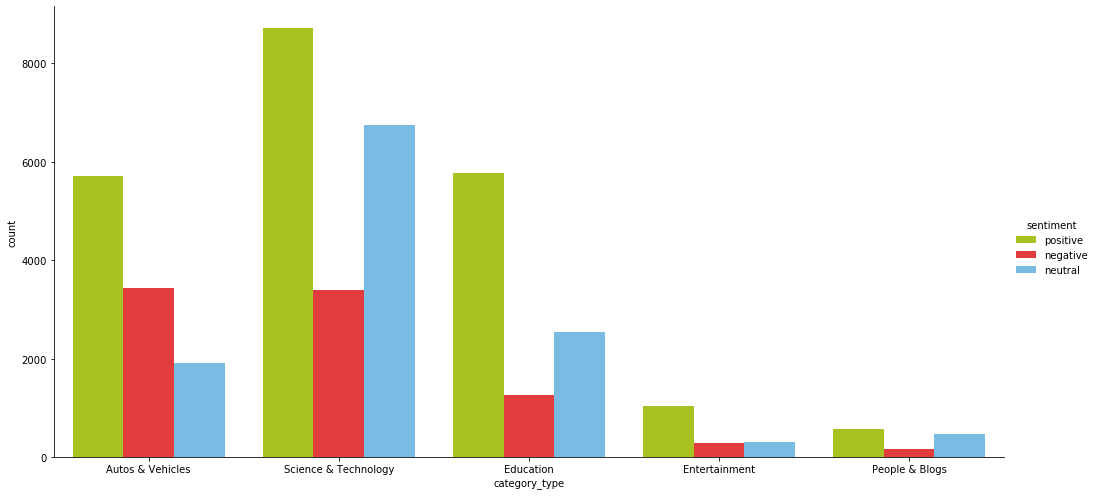

In [36]:
palette={"negative": "#FE2020",
         "positive": "#BADD07", 
         "neutral": "#68BFF5"}

sc = sns.catplot(x="category_type",
                 hue="sentiment",
                 data=ycc,
                 kind="count",
                 height=7,
                 aspect=2,
                 palette=palette)

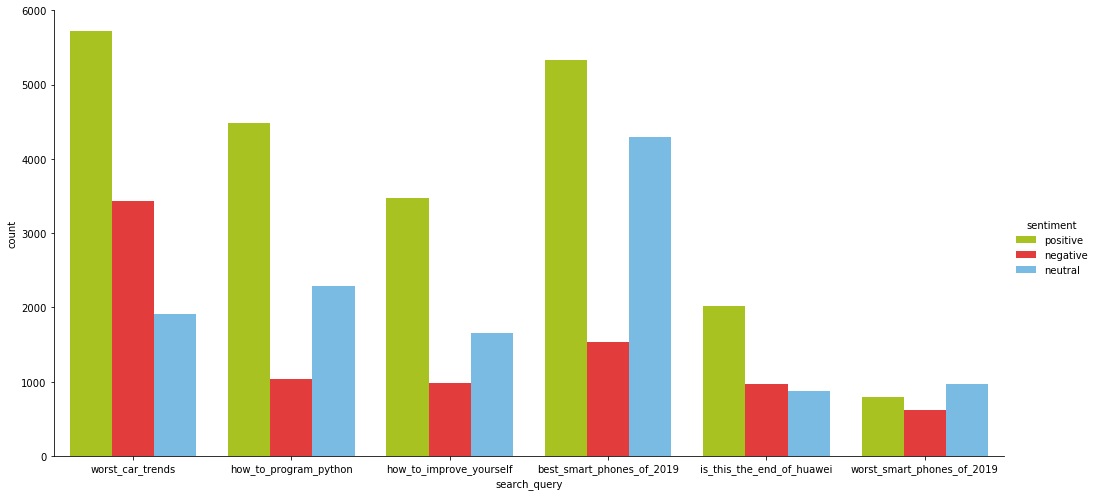

In [37]:
palette={"negative": "#FE2020",
         "positive": "#BADD07", 
         "neutral": "#68BFF5"}

sc = sns.catplot(x="search_query",
                 hue="sentiment",
                 data=ycc,
                 kind="count",
                 height=7,
                 aspect=2,
                 palette=palette)

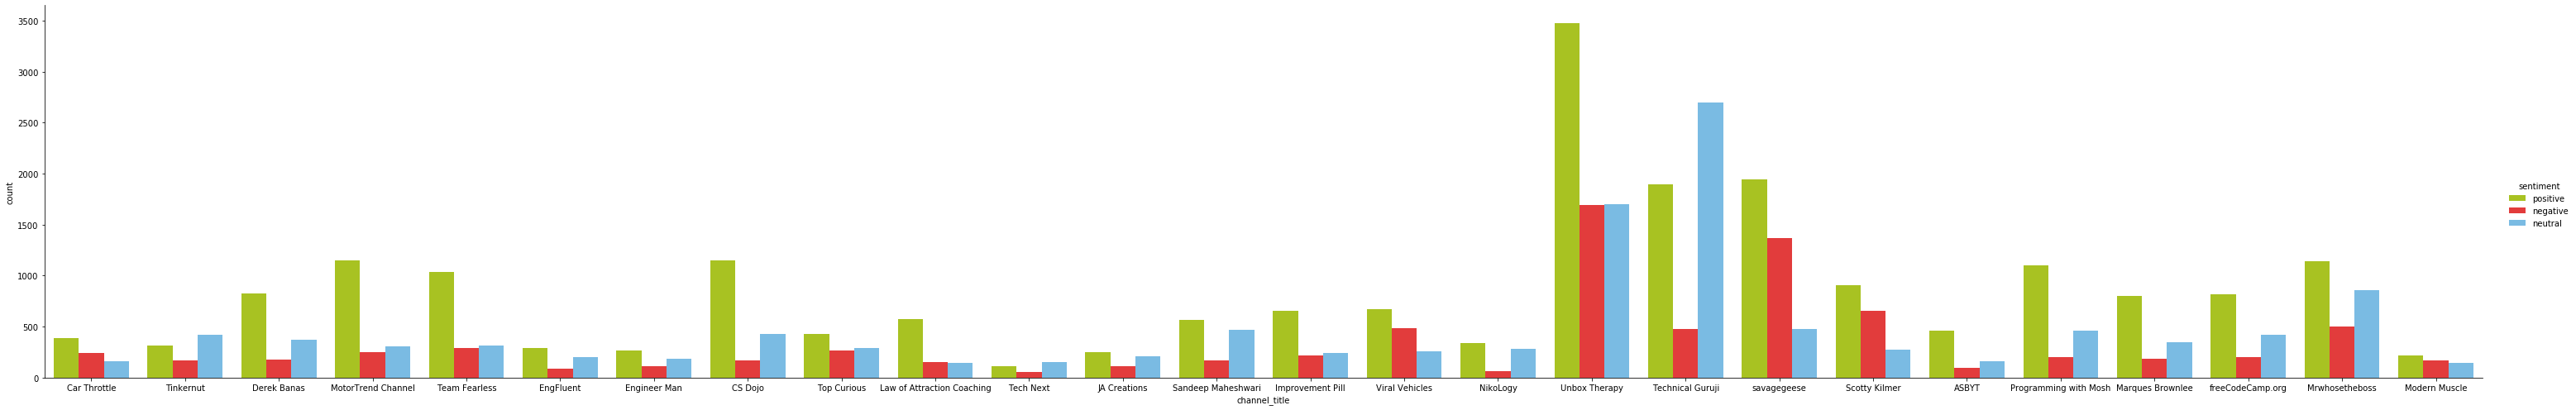

In [38]:
palette={"negative": "#FE2020",
         "positive": "#BADD07", 
         "neutral": "#68BFF5"}

sc = sns.catplot(x="channel_title",
                 hue="sentiment",
                 data=ycc,
                 kind="count",
                 height=7,
                 aspect=6,
                 orient="v",
                 palette=palette)

- **With this matrix we are going to compute a similarity score**
> We will be using the `cosine similarity` to calculate a numeric quantity that denotes the similarity between topics. The cosine similarity score is independent of magnitude and is relatively easy and fast to calculate with the TF-IDF scores.

**Calculating the dot product for the cosine similarity score with sklearn's `linear_kernel()` instead of `cosine_similarities()` since it has better performance**

* compute the cosine similarity matrix

* contruct a reverse map of indices and video titles

* define a function that takes the video title as input and, outputs a list of the 10 most similar video titles

In [39]:
from vuepoint.vuepoint.text_pipeline import preprocess_dataframe_text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def build_feature_matrix(docs, feature_type='frequency', ngram=(1,1), min_freq=0.0, max_freq=1.0):
    """Convert a collection of text documents to a matrix of token counts
    PARAMS
    ------
    docs : str, sequences of strings
        The corpus is expected to be the sequence strings or bytes items
        are expected to be analyzed directly.

    feature_type: str
        Select a feature type (binary|frequency|tfidf) for the document.

    ngram : tuple, int
        choose a ngram for the document frequency

    min_freq : float in range [0.0, 1.0] or int, default=1
        When building the vocabulary ignore terms that have a document
        frequency strictly lower than the given threshold. Parameter is
        linked to max_df from scikit-learn CountVectorizer() method

    max_freq : float in range [0.0, 1.0] or int, default=1.0
        When building the vocabulary ignore terms that have a document frequency
    strictly higher than the given threshold (corpus-specific stop words).
    """
    feature_type = feature_type.lower().strip()
    if feature_type == 'binary':
        vectorizer = CountVectorizer(
            binary=True, min_dif=min_freq, max_df=max_freq, ngram_range=ngram
        )
    if feature_type == 'frequency':
        vectorizer = CountVectorizer(
            binary=False, min_dif=min_freq, max_df=max_freq, ngram_range=ngram
        )
    if feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(
            min_df=min_freq, max_df=max_freq, ngram_range=ngram
        )
    else:
        raise Exception('Wrong feature entered, choose: binary, frequency, tfidf')
    feature_matrix = vectorizer.fit_transform(docs).astype(float)
    return vectorizer, feature_matrix

In [40]:
ycc = preprocess_dataframe_text(ycc, 'text')
ycc = ycc.to_csv('ycc_dataset_large/ycc_web_tensorboard.csv')
text_docs = ycc.text.values.tolist()
tfidf_vectorizer, tfidf_features = build_feature_matrix(text_docs,
                                                        feature_type='tfidf',
                                                        ngram=(1,1),
                                                        min_freq=0.0,
                                                        max_freq=1.0)

AttributeError: 'NoneType' object has no attribute 'text'

In [63]:
# from gensim.matutils import hellinger
def compute_cosine_similarity(query_features, corpus_features, topn=3):
    query_features = query_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    similarity = np.dot(query_features, corpus_features.T)
    top_queries = similarity.argsort()[::-1][:topn]
    query_scores = [(idx, round(similarity[idx], 3)) for idx in top_queries]
    return query_scores

def print_similar_comments(search_queries, features, n_comments):
    """Prints similar comments from string queries for debugging
    PARAMS
    ------
    search_queries : list of strings
        Pass a list containing sentences to search on the ycc
        courpus.

    features : scipy.sparse.csr.csr_matrix
        Pass a collection of text documents converted to a matrix
        of token counts. Use the build_feature_matrix() method

    n_comments : int
        Number of simmilar comments to print to the console
    """
    print("YouTube Comments Cosine Similarity Analysis\n")
    tfidf_queries = tfidf_vectorizer.transform(search_queries)
    for search, query in enumerate(search_queries):
        query_features = tfidf_queries[search]
        similar_docs = compute_cosine_similarity(
            query_features, features, n_comments
        )
        print(f"query{search + 1}: {query.upper()}")
        print(f"Top {len(similar_docs)} Similar Documents::\n")
        for doc, score in similar_docs:
            similar_doc = text_docs[doc]
            print(f"doc_id: {doc + 1}, similarity: {score}\ntext: {similar_doc}\n")
        print("=" * 40, "\n")

In [64]:
query1 = ['can you please do another video about',
          'love the content in the video',
          'make comparison video']

query2 = ['upload more info about this',
          'you are very clear',
          'subscribed']

query3 = ['video title should',
          'why i subscribed',
          'you should put ad on this video']

print_similar_comments(search_queries=query3, features=tfidf_features, n_comments=7)

YouTube Comments Cosine Similarity Analysis

query1: VIDEO TITLE SHOULD
Top 7 Similar Documents::

doc_id: 25612, similarity: 0.578
text: title of the video should be why everything that is not a toyota is stupid

doc_id: 28095, similarity: 0.574
text: i do not like your video title but i like your video

doc_id: 9335, similarity: 0.562
text: you should have said for your title is some cool car

doc_id: 39039, similarity: 0.529
text: i like the title that is what lew you for his video

doc_id: 18867, similarity: 0.521
text: how capitalist kill the competition should be title of this video

doc_id: 10853, similarity: 0.515
text: wow the title of this video say it all love it

doc_id: 10022, similarity: 0.505
text: car that might be banned in america should be the title


query2: WHY I SUBSCRIBED
Top 7 Similar Documents::

doc_id: 32592, similarity: 0.58
text: why the hell have not i been subscribed to this channel until today i could have sworn that i subscribed year ago

doc_id: 8203, 

In [19]:
#df[['author_name', 'time_tag', 'urls_tag', 'hash_tag', 'emoji_tag']].astype(str)
df2 = pd.read_csv('ycc_web_lg_NEW.csv', index_col=0, dtype={
    'author_name': str,
    'time_tag': str,
    'urls_tag': str, 
    'hash_tag': str, 
    'emoji_tag': str})

eda_df2 = eda_helper(df2)
eda_df2

,data_type,null_count,unique_count
dominant_topic,{float},0,10
topic_contrib,{float},0,40718
topic_keys,{str},0,10
author_name,"{str, float}",4,39217
text_id,{str},0,42388
text,{str},0,42233
time_posted,{str},0,78
search_query,{str},0,6
video_id,{str},0,36
word_count,{int},0,359


In [20]:
dataset_index = {
    'dominant_topic': 'topic_id',
    'topic_keys': 'topic_key_words',
    'author_name': 'author'}

df2 = df2.rename(columns=dataset_index)
df2.head()

,topic_id,topic_contrib,topic_key_words,author,text_id,text,time_posted,search_query,video_id,word_count,...,sentiment,time_tag,urls_tag,hash_tag,emoji_tag,search_query_id,category_id,category_type,channel_id,channel_title
0,6.0,0.191849,"thank, great, learn, love, watch, course, tuto...",Lord Twaddle,Ugg_1emKP9nPaHgCoAEC,People look back at my car (MGB) and laugh at ...,3 years ago,worst_car_trends,pZsfxh5eQ88,36,...,positive,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
1,9.0,0.700594,"company, china, battery, use, chinese, app, tr...",MJ Maranan,Ugg_dLWbwNThMngCoAEC,Someone tell me that I'm not the only one unsu...,3 years ago,worst_car_trends,pZsfxh5eQ88,17,...,positive,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
2,1.0,0.387513,"ban, tech, code, run, user, file, error, help,...",Sleepy .Time,Ugg-b-sXju4J03gCoAEC,does a video about 7 things we will look back ...,3 years ago,worst_car_trends,pZsfxh5eQ88,31,...,positive,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
3,4.0,0.470706,"drive, year, old, people, look, vehicle, stupi...",Monkey,Ugg-kDGtD6nCuHgCoAEC,"I`m sorry, but driving by yourselves will go o...",3 years ago,worst_car_trends,pZsfxh5eQ88,34,...,negative,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle
4,4.0,0.436842,"drive, year, old, people, look, vehicle, stupi...",The Awkward Guys Addison Trumbore,Ugg-YnV-wEP7K3gCoAEC,people stretch tires because in America its il...,2 years ago,worst_car_trends,pZsfxh5eQ88,31,...,negative,NaN,NaN,NaN,NaN,4,2,Autos & Vehicles,UCNBbCOuAN1NZAuj0vPe_MkA,Car Throttle


In [21]:
df2.to_csv('ycc_dataset_large/ycc_web_lg_v2.csv')